<a href="https://colab.research.google.com/github/itsmeharshit554/Image_classifcation_cnn/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install h5py pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
import os

In [5]:
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
len(gpus)

1

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
from google.colab.patches import cv2_imshow

In [9]:
data="/content/drive/MyDrive/training_data"
os.listdir(data)

['Tomato___Tomato_mosaic_virus',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Leaf_Mold']

In [10]:
img_ext=["jpeg","jpg","bmp","png"]
# image extentions list

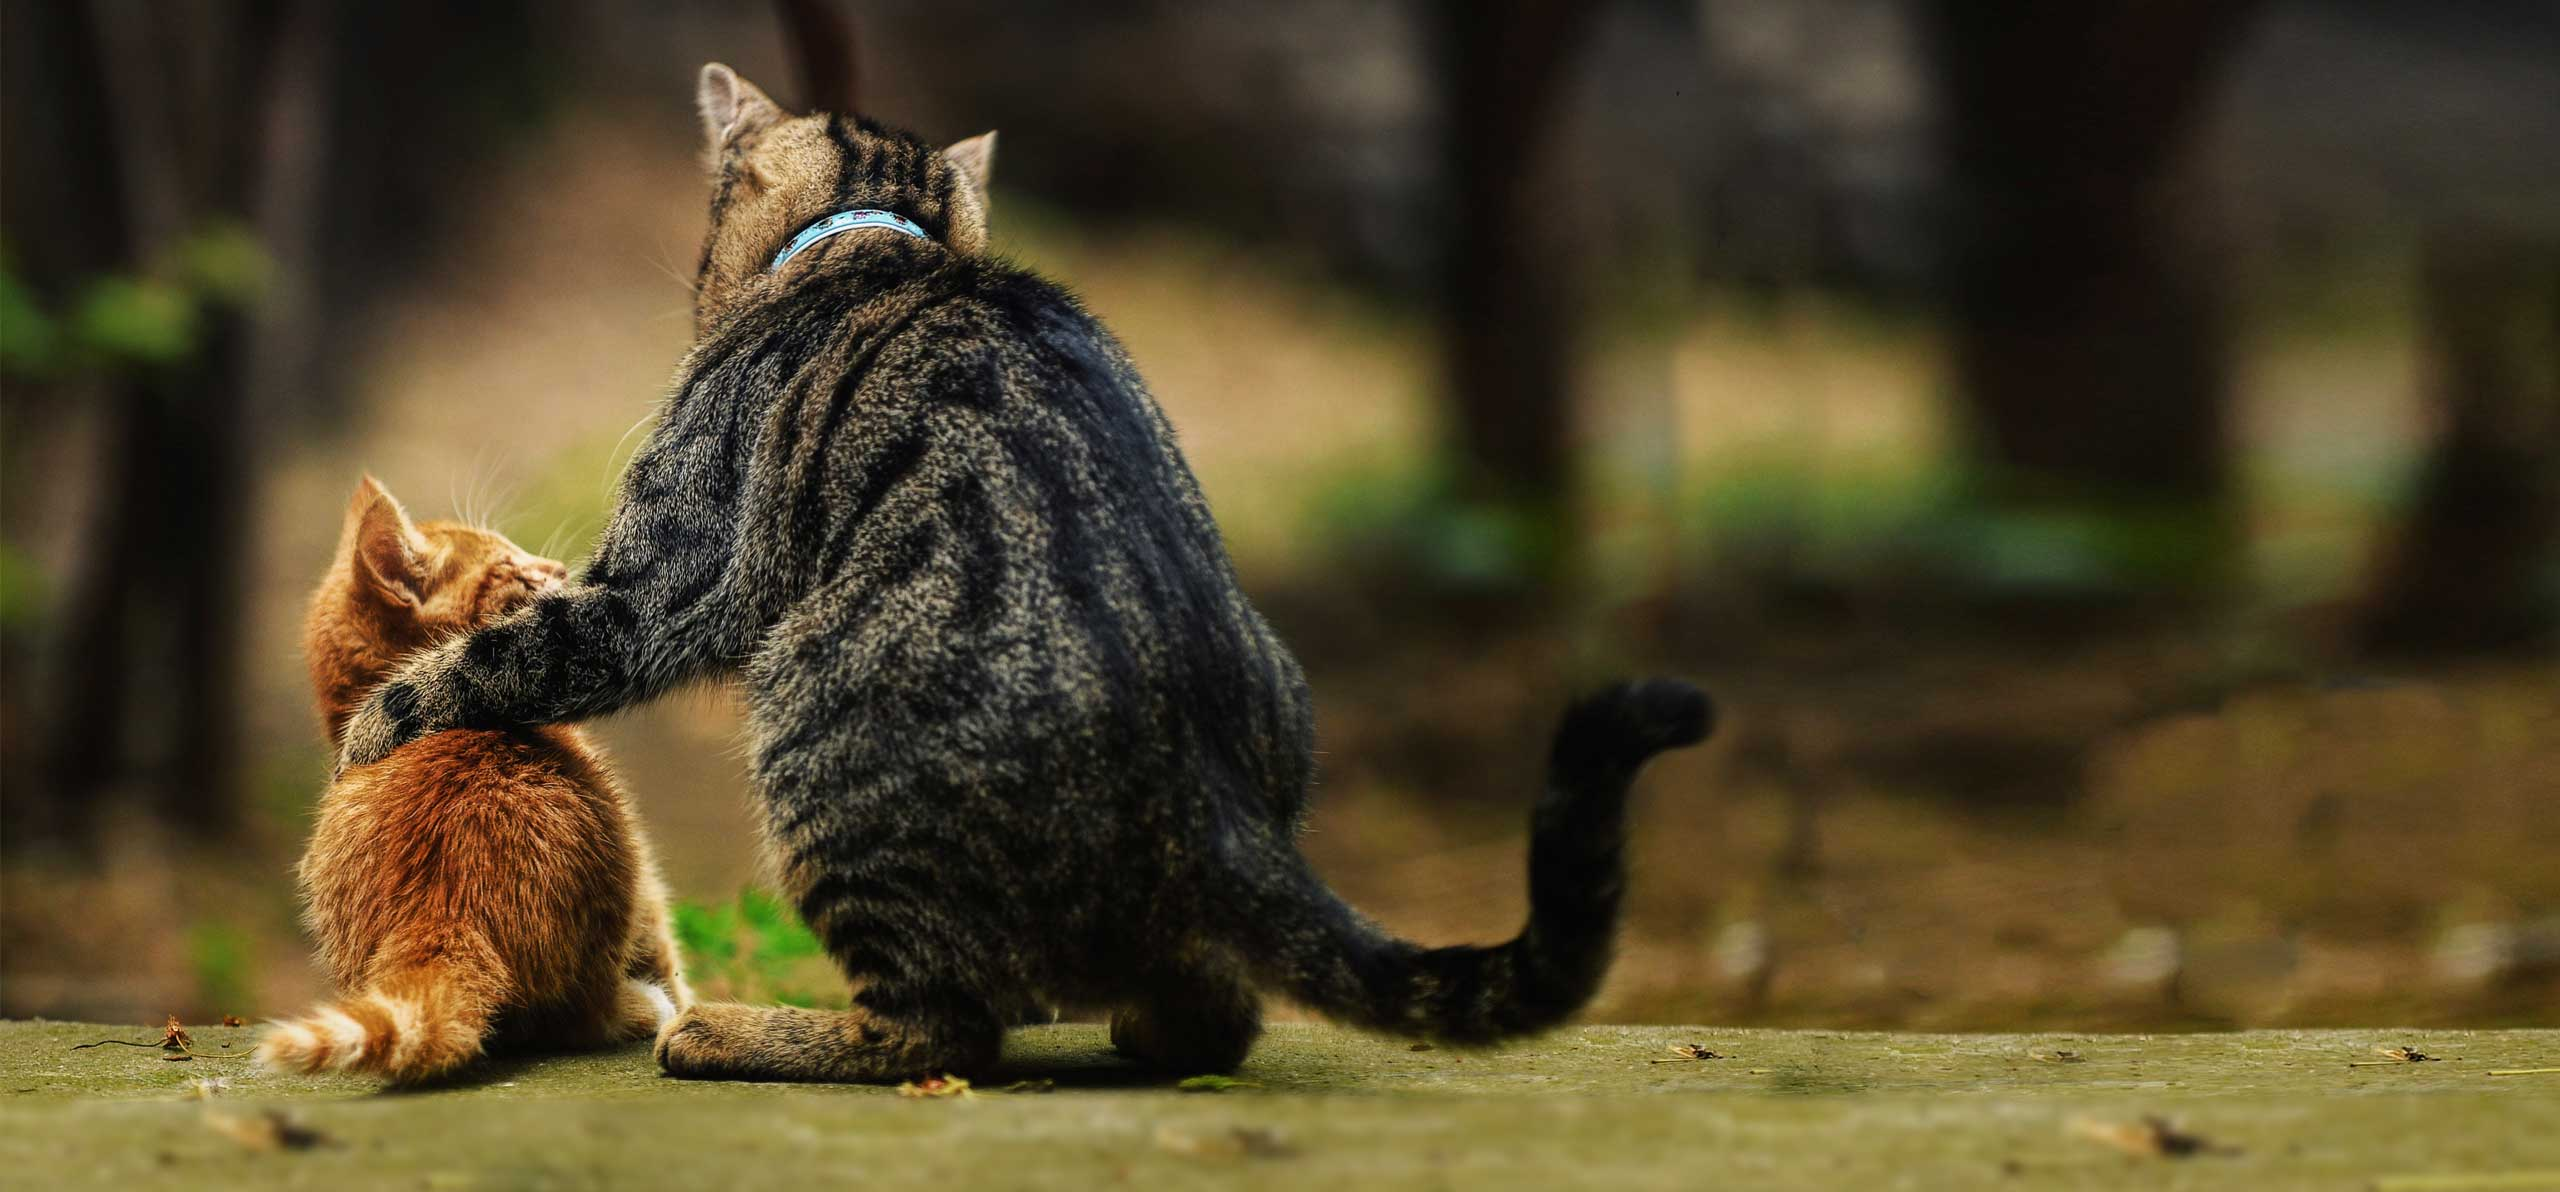

In [11]:
img=cv2.imread("/content/drive/MyDrive/data/cats/01_adding_cat_header.jpg")
cv2_imshow(img)

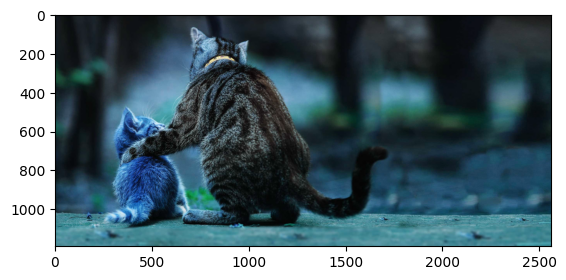

In [12]:
plt.imshow(img)
plt.show()

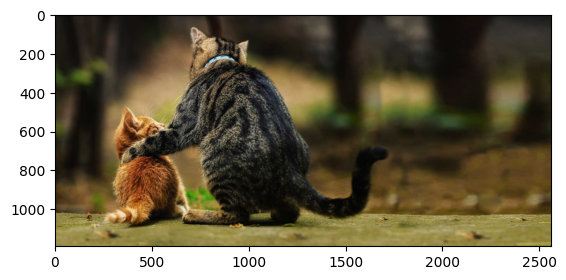

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
for image_class in os.listdir(data): 
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [15]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/training_data",image_size=(228,228))

Found 15600 files belonging to 10 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()
batch

(array([[[[139.0614  , 138.0614  , 143.0614  ],
          [137.9386  , 136.9386  , 141.9386  ],
          [137.42982 , 136.42982 , 141.42982 ],
          ...,
          [149.24562 , 149.24562 , 149.24562 ],
          [148.1228  , 148.1228  , 148.1228  ],
          [147.      , 147.      , 147.      ]],
 
         [[141.29572 , 140.29572 , 145.29572 ],
          [140.      , 139.      , 144.      ],
          [139.49123 , 138.49123 , 143.49123 ],
          ...,
          [148.12282 , 148.12282 , 148.12282 ],
          [147.      , 147.      , 147.      ],
          [146.0501  , 146.0501  , 146.0501  ]],
 
         [[142.8772  , 141.8772  , 146.8772  ],
          [140.8158  , 139.8158  , 144.8158  ],
          [140.30702 , 139.30702 , 144.30702 ],
          ...,
          [146.90575 , 146.90575 , 146.90575 ],
          [145.87718 , 145.87718 , 145.87718 ],
          [145.69298 , 145.69298 , 145.69298 ]],
 
         ...,
 
         [[ 82.097786,  82.097786,  74.097786],
          [ 82.314

In [20]:
len(batch)
# will print the groups in which dataset is classified

2

In [21]:
batch[1]

array([7, 0, 7, 9, 9, 3, 3, 4, 1, 8, 2, 1, 2, 9, 1, 1, 6, 2, 9, 3, 6, 2,
       3, 2, 1, 5, 0, 5, 7, 9, 2, 9], dtype=int32)

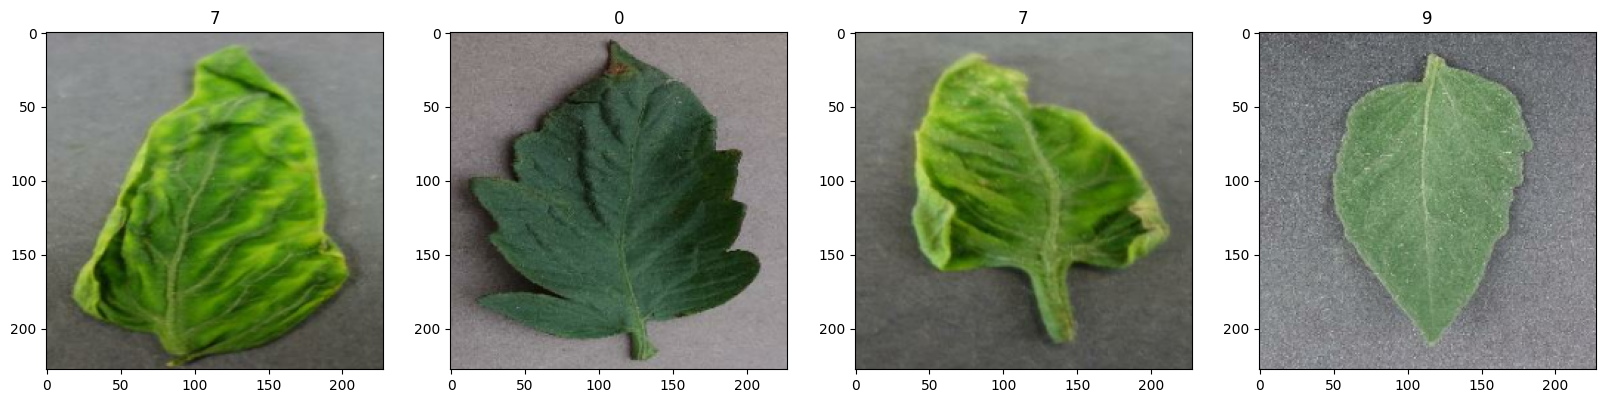

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator=data.as_numpy_iterator()


In [24]:
scaled_iterator1=scaled_iterator.next()
scaled_iterator1


(array([[[[0.4862742 , 0.4117644 , 0.39607814],
          [0.48750114, 0.41299134, 0.39730507],
          [0.52104086, 0.44653106, 0.43084478],
          ...,
          [0.59196925, 0.548832  , 0.54098886],
          [0.6199691 , 0.5768319 , 0.56898874],
          [0.52647156, 0.48333433, 0.4754912 ]],
 
         [[0.5979369 , 0.5234271 , 0.50774086],
          [0.57062083, 0.496111  , 0.48042473],
          [0.5565468 , 0.48203704, 0.46635076],
          ...,
          [0.5581037 , 0.5149664 , 0.5071233 ],
          [0.6305393 , 0.58740205, 0.5795589 ],
          [0.6525963 , 0.60945904, 0.60161585]],
 
         [[0.50770193, 0.4331921 , 0.41750583],
          [0.51356524, 0.43905547, 0.4233692 ],
          [0.54015136, 0.46564162, 0.44995534],
          ...,
          [0.5124174 , 0.4692801 , 0.46143696],
          [0.4962749 , 0.45313764, 0.4452945 ],
          [0.5180958 , 0.47495857, 0.46711543]],
 
         ...,
 
         [[0.3507902 , 0.26843727, 0.24882941],
          [0.42154

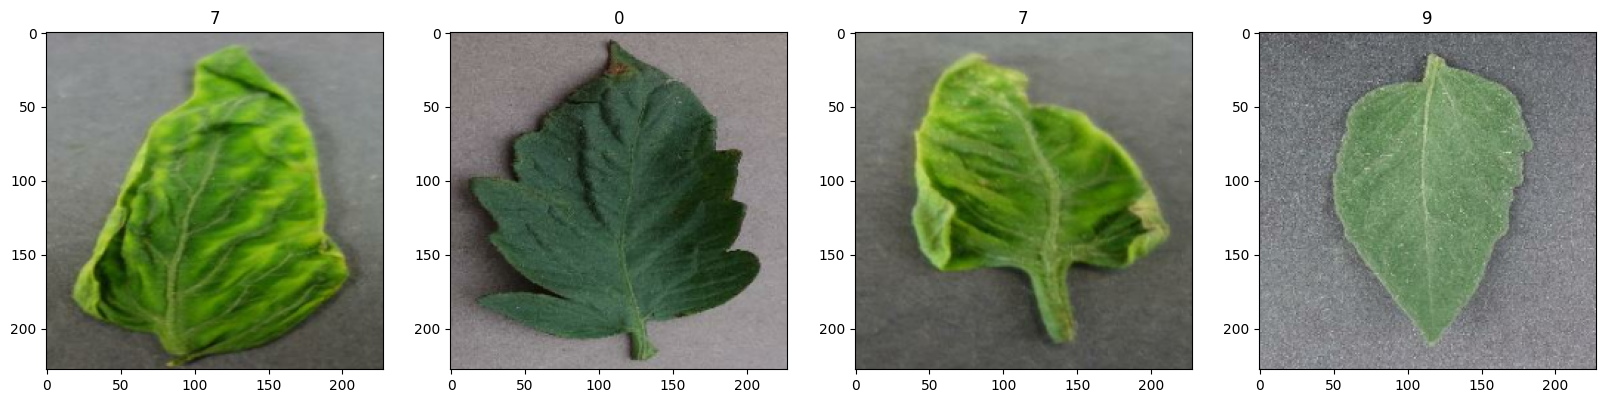

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [27]:
train_size+test_size+val_size

486

In [28]:
len(data)

488

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [31]:
model=Sequential()

In [32]:
model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(228,228,3)))
model.add(MaxPooling2D())


model.add(Conv2D(64, (3,3), 1, activation='relu'))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='sigmoid'))

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 226, 226, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      36928     
                                                                 
 flatten (Flatten)           (None, 788544)            0         
                                                                 
 dense (Dense)               (None, 256)               201867520 
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

In [35]:
hist=model.fit(train, batch_size=300, epochs=15, validation_data=val)
# Compile it 


Epoch 1/15
341/341 [==============================] - 73s 183ms/step - loss: 1.6970 - accuracy: 0.5849 - val_loss: 0.6877 - val_accuracy: 0.7635
Epoch 2/15
341/341 [==============================] - 64s 186ms/step - loss: 0.4630 - accuracy: 0.8445 - val_loss: 0.4698 - val_accuracy: 0.8418
Epoch 3/15
341/341 [==============================] - 78s 227ms/step - loss: 0.1996 - accuracy: 0.9339 - val_loss: 0.6025 - val_accuracy: 0.8102
Epoch 4/15
341/341 [==============================] - 78s 227ms/step - loss: 0.0924 - accuracy: 0.9697 - val_loss: 0.6475 - val_accuracy: 0.8399
Epoch 5/15
341/341 [==============================] - 77s 225ms/step - loss: 0.0709 - accuracy: 0.9777 - val_loss: 0.6368 - val_accuracy: 0.8479
Epoch 6/15
341/341 [==============================] - 78s 227ms/step - loss: 0.0744 - accuracy: 0.9761 - val_loss: 0.8762 - val_accuracy: 0.8009
Epoch 7/15
341/341 [==============================] - 77s 226ms/step - loss: 0.0672 - accuracy: 0.9776 - val_loss: 0.7206 - val_ac

In [36]:
hist.history

{'loss': [1.697019338607788,
  0.46304571628570557,
  0.19958116114139557,
  0.09236513078212738,
  0.07087738811969757,
  0.07441218942403793,
  0.06715135276317596,
  0.022024208679795265,
  0.04613060504198074,
  0.04212584346532822,
  0.1259593665599823,
  0.03695141151547432,
  0.006827071774750948,
  0.02369512990117073,
  0.05788111686706543],
 'accuracy': [0.5848606824874878,
  0.8444831371307373,
  0.9339259266853333,
  0.9696664214134216,
  0.977730929851532,
  0.976081371307373,
  0.9776393175125122,
  0.9928519129753113,
  0.9857954382896423,
  0.9854288697242737,
  0.9612353444099426,
  0.9893695116043091,
  0.9982587695121765,
  0.9938599467277527,
  0.9839625954627991],
 'val_loss': [0.6877157688140869,
  0.4697578251361847,
  0.602532148361206,
  0.6475173234939575,
  0.6368337273597717,
  0.8762233257293701,
  0.7206413745880127,
  0.9490006566047668,
  1.304263710975647,
  1.3161897659301758,
  1.0643763542175293,
  1.0601844787597656,
  0.8517942428588867,
  1.316123

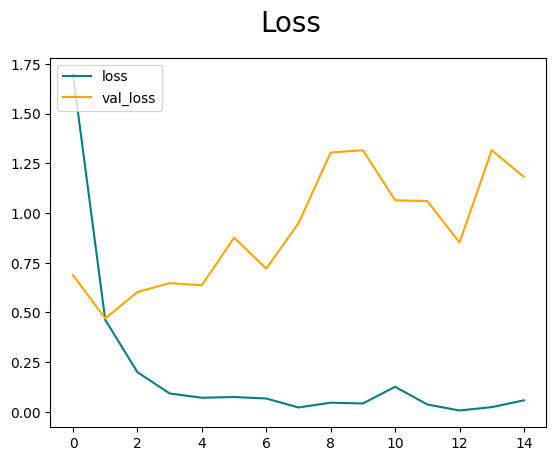

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


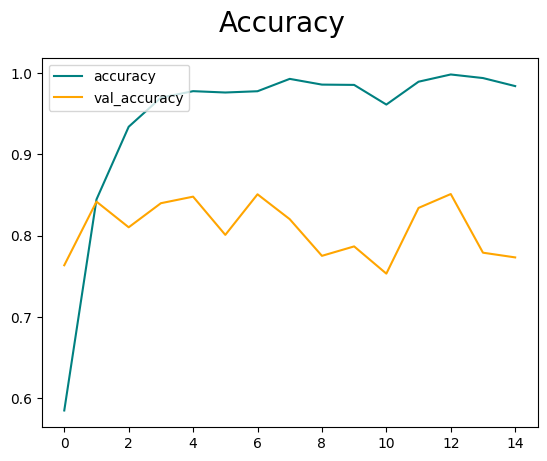

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [41]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [43]:
for batch in val.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 195ms/step


ValueError: ignored

In [ ]:
print(pre.result(), re.result(), acc.result())

In [ ]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

In [ ]:
import cv2


In [ ]:
img2 = cv2.imread('/content/dsds.jpg')
plt.imshow(img2)
plt.show()

In [ ]:
resize = tf.image.resize(img2, (228,228))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

In [ ]:
resize.shape

In [ ]:
np.expand_dims(resize,0).shape

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

    # the model created before was of differenting between cat and dog which had 
    # an accuarcy of 99% but this is having accuracy of 10-11%

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model.save("tomato_disease_leaf_detection_cnn.h5")
cnn_model.save("tomato_disease_leaf_detection_cnn.h5") # Save model
 
# Load model
tomato_disease_leaf_detection_cnn = keras.models.load_model("tomato_disease_leaf_detection_cnn.h5")
 
Y_pred_sample = tomato_disease_leaf_detection_cnn.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample
 
np.argmax(Y_pred_sample[0])
 
y_test[0]